### Detect Geometric Shapes using OpenCV

This is to detect simple shapes

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [14]:
image = cv.imread('shapes.jpg')

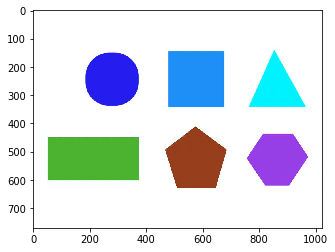

In [5]:
plt.imshow(image)

In [15]:
img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [7]:
cv.imshow('shapes', img_gray)
cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)

-1

In [16]:
#find the threshold
#values:(image, thresvalue(can use trackbar to check), maxthresvalue, threstype)

_,thres = cv.threshold(img_gray, 240, 255, cv.THRESH_BINARY)

In [19]:
cv.imshow('thres',thres)
cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)

-1

In [20]:
#find contours(we use _ since we dont need second value)
#values:(image, mode, method of contour)

contours,_ = cv.findContours(thres, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

In [21]:
print ('Number of contours: '+ str(len(contours))) 

Number of contours: 61


In [22]:
#interate over all the contours
#use a method called approxPolyDP - it approximates polygominal shapes with specific precision. 
#
#values:(curve(the contour we found in the image), 
#        epsilon (parameter specifying approx accuracy)*method - arc.length(), closed(true/false).

# cv.arcLench(calculates a contour paramenter or a curve length) values:(curves, 
#                        closed or open contours(in our case we have all closed shapes) 
#cv.drawContour values:(image, approx value, contour_index = 0(as we working on one comtour at a time), color, thickness)


for contour in contours:
    approx = cv.approxPolyDP(contour, 0.01*cv.arcLength(contour, True), True)
    cv.drawContours(image, [approx], 0, (0,0,0), 5) #draw back in original image, approximation another way
    
    #print the shape what shape it is: we have to find coordinates using approx variable.
    x = approx.ravel()[0] #index here will x coordinate
    y = approx.ravel()[1] - 15 #index to have y coordinates (adjusting after viewing image)
    
    if len(approx) == 3:   #approx variable to calc. approximate number of polygonal curves, we can know what shape
        
        #to print on orignial image 
        cv.putText(image, 'Triangle', (x,y), cv.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))
        
    elif len(approx) == 4:   #same logic we can know a 4 sided to be square or rectange
        
        #to decide if is rect. or square, we can use bindingContour gives w,h,x,y
        x1, y1, w, h = cv.boundingRect(approx)
        aspect_ratio = float(w)/h #based on width and height we can find aspect ratio
        print(aspect_ratio)
        
        if aspect_ratio >= 0.95 and aspect_ratio <1.05:
            
            #to print on orignial image
            cv.putText(image, 'Square', (x1,y1), cv.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))
            
        else:
        
            #to print on orignial image
            cv.putText(image, 'Rectangle', (x1,y1), cv.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))
        
    elif len(approx) == 5:   #same logic we can know a 5 sided to be square or rectange
        
        #to print on orignial image 
        cv.putText(image, 'Pentagon', (x,y), cv.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))
        
    elif len(approx) == 6:   #same logic we can know a 6 sided to be square or rectange
        
        #to print on orignial image 
        cv.putText(image, 'Hexagon', (x,y), cv.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))
        
    #elif len(approx) == 10:   #same logic we can know a 10 sided to be square or rectange
        
        #to print 
        #cv.putText(image, 'Star', (x,y), cv.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))
        
    else:
        cv.putText(image, 'Circle', (x,y), cv.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))
        

cv.imshow('shapes', image)
cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)

1.3298701298701299
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.082802547770701
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.995049504950495


-1